#IS 470 Lab 5: K Nearest Neighbor

---

This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>
<br>
Target variable: **IsBadBuy**

## 1.Upload and clean data

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving carAuction.csv to carAuction (1).csv
User uploaded file "carAuction.csv" with length 589088 bytes


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [ ]:
# Read data
carAuction = pd.read_csv("carAuction.csv")
carAuction

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy
...,...,...,...,...,...,...,...,...,...,...,...
9995,ADESA,RED,No,7536,SMALL SUV,CHRYSLER,6600,4,85377,983,Alloy
9996,ADESA,BLACK,No,4921,LARGE TRUCK,GM,7000,7,89665,1543,Alloy
9997,ADESA,BLACK,No,9263,MEDIUM SUV,CHRYSLER,9000,4,59383,1417,Alloy
9998,ADESA,BLUE,No,3240,MEDIUM,OTHER,5500,4,48642,482,Covers


In [ ]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy


In [ ]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [ ]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [ ]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

## 2.Partition the data set for K Nearest Neighbor model

In [ ]:
# Create dummy variables
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special,WheelType_unkwnWheel
0,No,2871,5300,8,75419,869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Yes,1840,3600,8,82944,2322,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,No,8931,7500,4,57338,588,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,No,8320,8500,5,55909,1169,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,No,11520,10100,5,86702,853,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,7536,6600,4,85377,983,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9996,No,4921,7000,7,89665,1543,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9997,No,9263,9000,4,59383,1417,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9998,No,3240,5500,4,48642,482,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
target = carAuction['IsBadBuy']
predictors = carAuction.drop(['IsBadBuy'],axis=1)
# Apply minmax normalization on predictors
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special,WheelType_unkwnWheel
0,0.104237,0.171627,0.875,0.672907,0.074665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.066805,0.114136,0.875,0.744636,0.341222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.324257,0.246026,0.375,0.500558,0.023115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.302073,0.279844,0.500,0.486936,0.129701,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.418255,0.333953,0.500,0.780457,0.071730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.273609,0.215590,0.375,0.767827,0.095579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.178666,0.229117,0.750,0.808701,0.198312,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,0.336310,0.296753,0.375,0.520051,0.175197,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.117634,0.178390,0.375,0.417667,0.003669,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
# Partition the data
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors_normalized, target, test_size = 0.3, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(7000, 39) (3000, 39) (7000,) (3000,)


In [ ]:
# Examine the porportion of target variable for training data set
print(target_train.value_counts(normalize=True))

No     0.869571
Yes    0.130429
Name: IsBadBuy, dtype: float64


In [ ]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

No     0.872667
Yes    0.127333
Name: IsBadBuy, dtype: float64


## 3.K Nearest Neighbor model prediction

### Build a K Nearest Neighbor model with n_neighbors = 1

In [ ]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 1
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(predictors_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# Make predictions on training and testing data
prediction_on_train = model1.predict(predictors_train)
prediction_on_test = model1.predict(predictors_test)

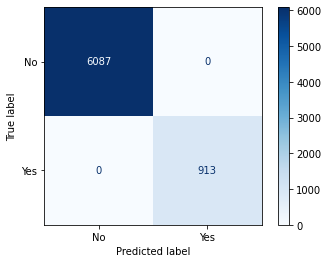

In [ ]:
# Examine the evaluation results on training data: confusion_matrix
plot_confusion_matrix(model1, predictors_train, target_train, cmap= plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      6087
         Yes       1.00      1.00      1.00       913

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



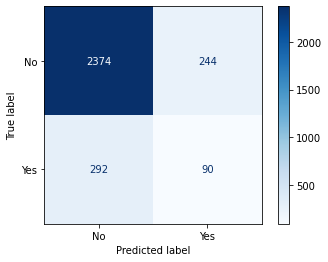

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model1, predictors_test, target_test, cmap= plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.89      0.91      0.90      2618
         Yes       0.27      0.24      0.25       382

    accuracy                           0.82      3000
   macro avg       0.58      0.57      0.57      3000
weighted avg       0.81      0.82      0.82      3000



Q1. Compare the performances on training and testing sets <br>

a. Why we have perfect evaluation results on the training data?<br>
We used that vehicles own BadBuyValue to predict the vehicles target variable value in the training data set
b. Does the KNN model with n_neighbors = 1 generalize well on the testing set? why?<br>
No because the model is overfitting


### Build a K Nearest Neighbor model with n_neighbors = 3

In [ ]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 3
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(predictors_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Make predictions on training and testing data
prediction_on_train = model2.predict(predictors_train)
prediction_on_test = model2.predict(predictors_test)

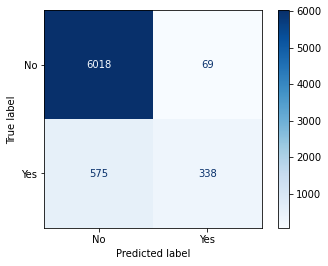

In [ ]:
# Examine the evaluation results on training data: confusion_matrix
plot_confusion_matrix(model2, predictors_train, target_train, cmap= plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.91      0.99      0.95      6087
         Yes       0.83      0.37      0.51       913

    accuracy                           0.91      7000
   macro avg       0.87      0.68      0.73      7000
weighted avg       0.90      0.91      0.89      7000



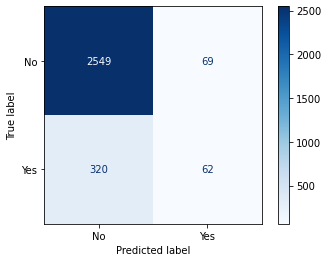

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model2, predictors_test, target_test, cmap= plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93      2618
         Yes       0.47      0.16      0.24       382

    accuracy                           0.87      3000
   macro avg       0.68      0.57      0.59      3000
weighted avg       0.84      0.87      0.84      3000



### Build a K Nearest Neighbor model with n_neighbors = 10

In [ ]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 10
model3 = KNeighborsClassifier(n_neighbors=10)
model3.fit(predictors_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# Make predictions on training and testing data
prediction_on_train = model3.predict(predictors_train)
prediction_on_test = model3.predict(predictors_test)

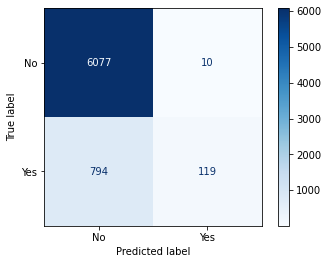

In [ ]:
# Examine the evaluation results on training data: confusion_matrix
plot_confusion_matrix(model3, predictors_train, target_train, cmap= plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.88      1.00      0.94      6087
         Yes       0.92      0.13      0.23       913

    accuracy                           0.89      7000
   macro avg       0.90      0.56      0.58      7000
weighted avg       0.89      0.89      0.85      7000



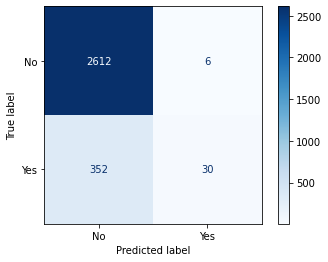

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model3, predictors_test, target_test, cmap= plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.88      1.00      0.94      2618
         Yes       0.83      0.08      0.14       382

    accuracy                           0.88      3000
   macro avg       0.86      0.54      0.54      3000
weighted avg       0.88      0.88      0.83      3000



Q2. Which KNN model is the best for identifying bad buy cars (n_neighbors=1, 3 or 10)? and why? <br>
<br>
Model 1 (n_neighbors=1) is the best for identifying the most bad buy cars. Model 1 was capable of identifying 90 'IsBadBuy=Yes' cars. Has the highest recall value of 0.24



Q3. Compare the performances on the training and testing data with n_neighbors = 1, 3, and 10. How the KNN model performs as we increase the value of n_neighbors?<br>
<br>
As we increase the value of n_neighbors our overall accuracy increases for the testing data set while the training data set overall accuracy decreases. Model 3 has the highest accuracy percentage at 0.88. However, it also has the lowest accuracy for its training data set at 0.89. But Model 3 is still the most accurate since the testing data-set is the most important data-set we pay attention to. Since the training and testing data-set for Model 3 only have a 1% difference (0.89 vs 0.88) this means it is highly accurate and not overfitting (Model 1 is overfitting).

## 4.Generalization and Overfitting

### Build a decision tree model with max_depth = 1

In [ ]:
# Build a decision tree model on training data with max_depth = 1
model_tree1 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 1)
model_tree1.fit(predictors_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

[Text(837.0, 815.4000000000001, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.559\nsamples = 7000\nvalue = [6087, 913]\nclass = No'),
 Text(418.5, 271.79999999999995, 'entropy = 0.472\nsamples = 6686\nvalue = [6011, 675]\nclass = No'),
 Text(1255.5, 271.79999999999995, 'entropy = 0.798\nsamples = 314\nvalue = [76, 238]\nclass = Yes')]

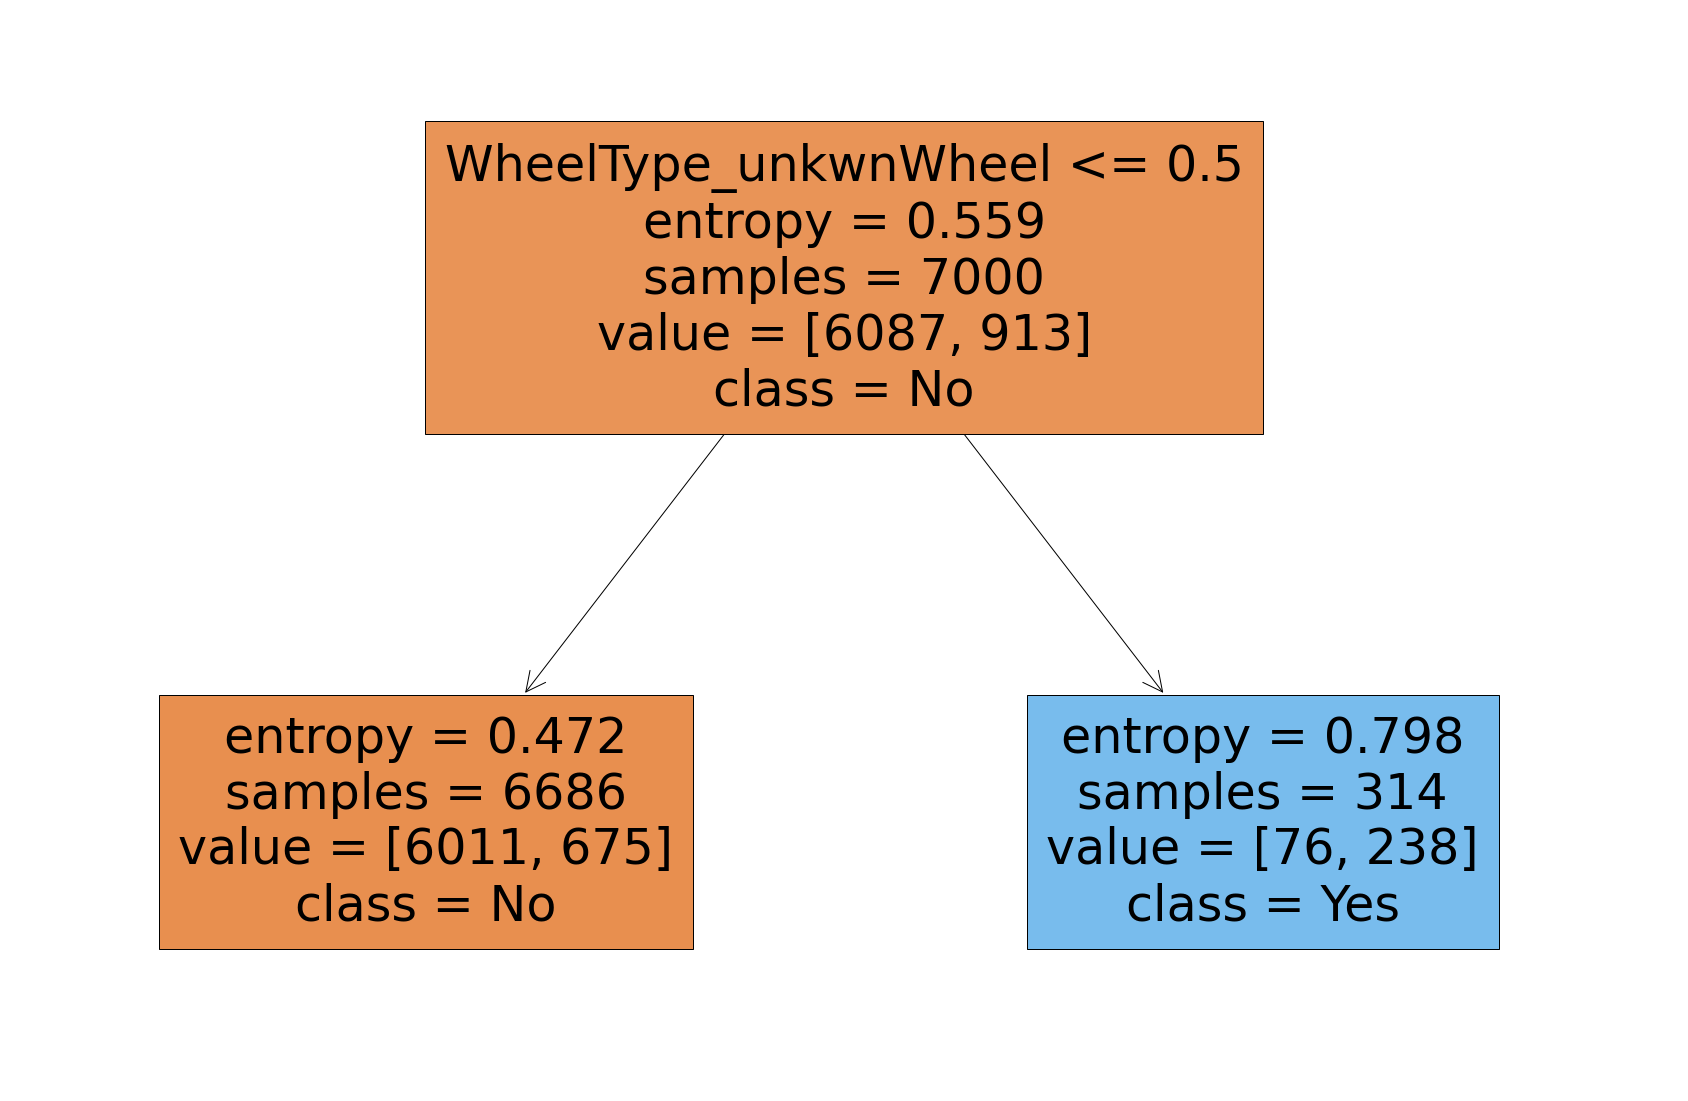

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_tree1, 
               feature_names=list(carAuction.columns)[1:],  
               class_names=['No','Yes'],
               filled=True)

In [ ]:
# Make predictions on training and testing data
prediction_on_train = model_tree1.predict(predictors_train)
prediction_on_test = model_tree1.predict(predictors_test)

In [ ]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.90      0.99      0.94      6087
         Yes       0.76      0.26      0.39       913

    accuracy                           0.89      7000
   macro avg       0.83      0.62      0.66      7000
weighted avg       0.88      0.89      0.87      7000



In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.90      0.99      0.94      2618
         Yes       0.76      0.26      0.39       382

    accuracy                           0.90      3000
   macro avg       0.83      0.62      0.67      3000
weighted avg       0.88      0.90      0.87      3000



### Build a decision tree model with max_depth = 2

In [ ]:
# Build a decision tree model on training data with max_depth = 2
model_tree2 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
model_tree2.fit(predictors_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

[Text(837.0, 906.0, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.559\nsamples = 7000\nvalue = [6087, 913]\nclass = No'),
 Text(418.5, 543.6, 'VehicleAge <= 0.438\nentropy = 0.472\nsamples = 6686\nvalue = [6011, 675]\nclass = No'),
 Text(209.25, 181.19999999999993, 'entropy = 0.348\nsamples = 4064\nvalue = [3799, 265]\nclass = No'),
 Text(627.75, 181.19999999999993, 'entropy = 0.626\nsamples = 2622\nvalue = [2212, 410]\nclass = No'),
 Text(1255.5, 543.6, 'Auction_MANHEIM <= 0.5\nentropy = 0.798\nsamples = 314\nvalue = [76, 238]\nclass = Yes'),
 Text(1046.25, 181.19999999999993, 'entropy = 0.567\nsamples = 247\nvalue = [33, 214]\nclass = Yes'),
 Text(1464.75, 181.19999999999993, 'entropy = 0.941\nsamples = 67\nvalue = [43, 24]\nclass = No')]

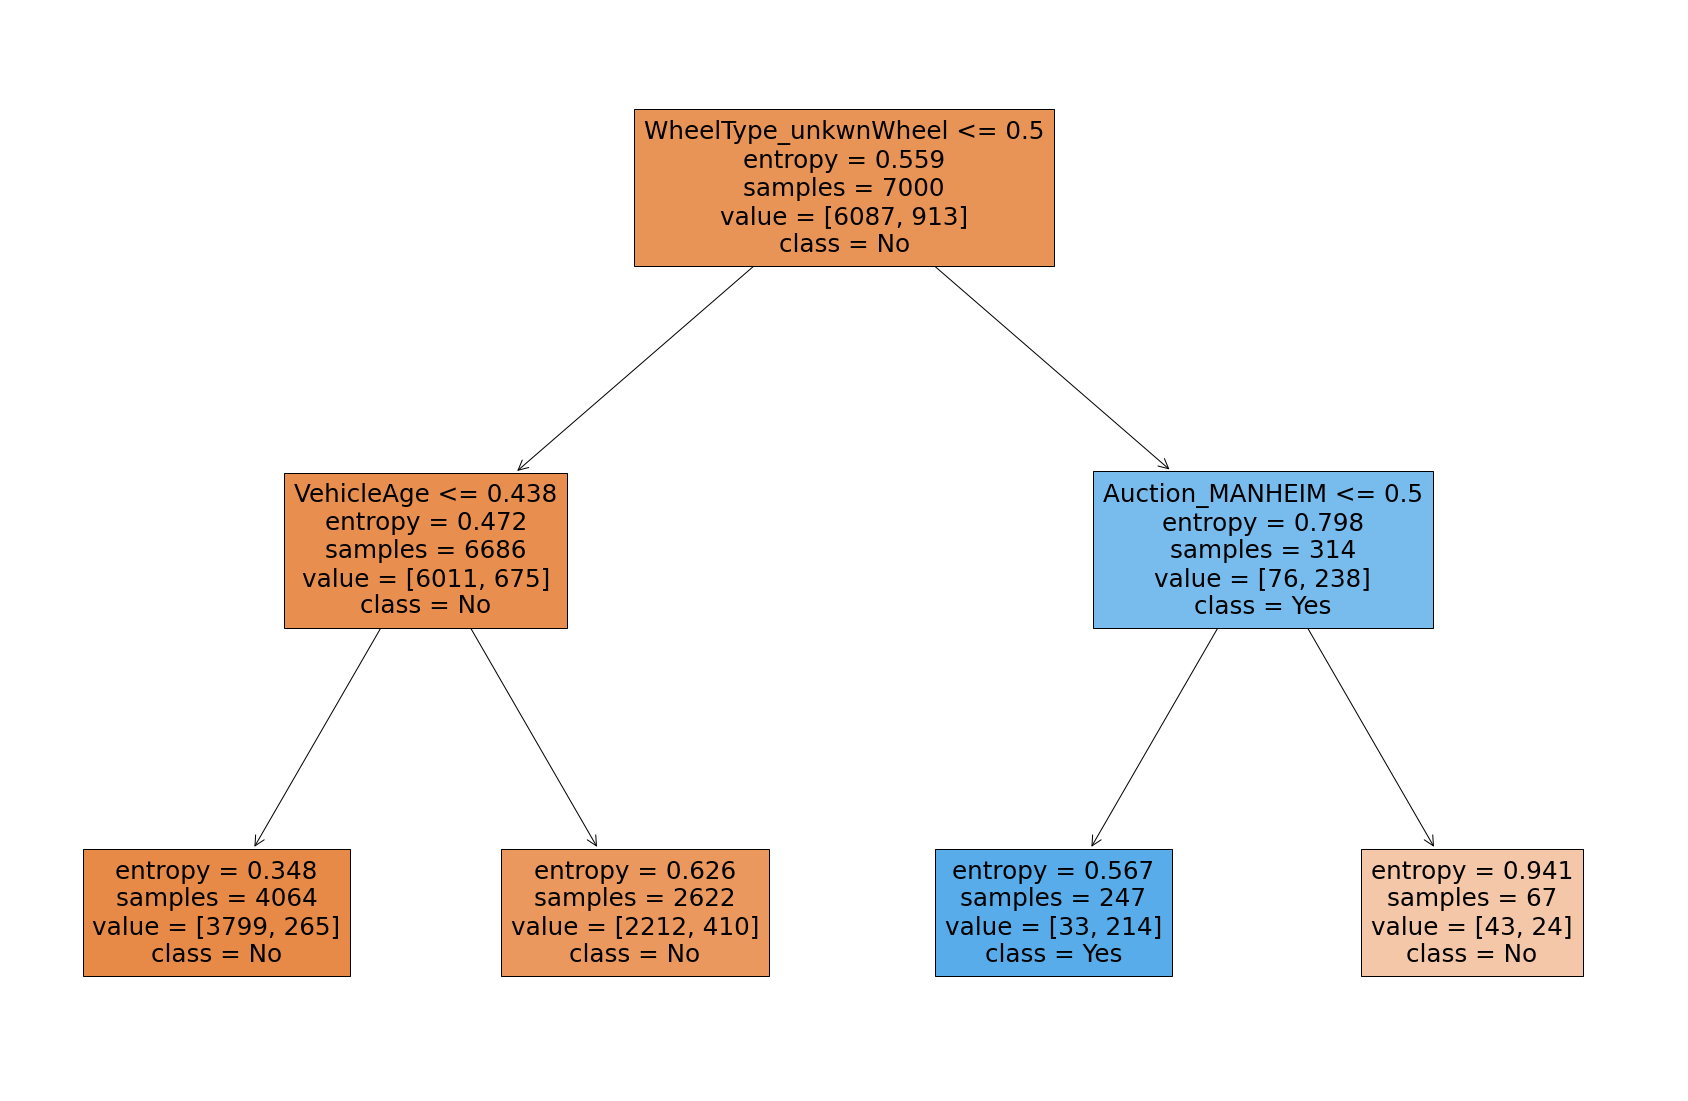

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_tree2, 
               feature_names=list(carAuction.columns)[1:],  
               class_names=['No','Yes'],
               filled=True)

In [ ]:
# Make predictions on training and testing data
prediction_on_train = model_tree2.predict(predictors_train)
prediction_on_test = model_tree2.predict(predictors_test)

In [ ]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.90      0.99      0.94      6087
         Yes       0.87      0.23      0.37       913

    accuracy                           0.90      7000
   macro avg       0.88      0.61      0.66      7000
weighted avg       0.89      0.90      0.87      7000



In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.90      1.00      0.94      2618
         Yes       0.90      0.22      0.36       382

    accuracy                           0.90      3000
   macro avg       0.90      0.61      0.65      3000
weighted avg       0.90      0.90      0.87      3000



### Build a decision tree model with max_depth = 10

In [ ]:
# Build a decision tree model on training data with max_depth = 1
model_tree3 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 10)
model_tree3.fit(predictors_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

[Text(1085.3258522727274, 1037.7818181818182, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.559\nsamples = 7000\nvalue = [6087, 913]\nclass = No'),
 Text(602.75625, 938.9454545454546, 'VehicleAge <= 0.438\nentropy = 0.472\nsamples = 6686\nvalue = [6011, 675]\nclass = No'),
 Text(253.425, 840.1090909090909, 'MMRCurrentAuctionAveragePrice <= 0.173\nentropy = 0.348\nsamples = 4064\nvalue = [3799, 265]\nclass = No'),
 Text(141.1909090909091, 741.2727272727273, 'WarrantyCost <= 0.006\nentropy = 0.513\nsamples = 559\nvalue = [495, 64]\nclass = No'),
 Text(134.42727272727274, 642.4363636363637, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0]\nclass = No'),
 Text(147.95454545454547, 642.4363636363637, 'MMRCurrentAuctionAveragePrice <= 0.17\nentropy = 0.536\nsamples = 523\nvalue = [459, 64]\nclass = No'),
 Text(99.76363636363637, 543.6, 'TopThreeAmericanName_GM <= 0.5\nentropy = 0.498\nsamples = 485\nvalue = [432, 53]\nclass = No'),
 Text(50.72727272727273, 444.76363636363635, 'VehBCost <= 0.127\nent

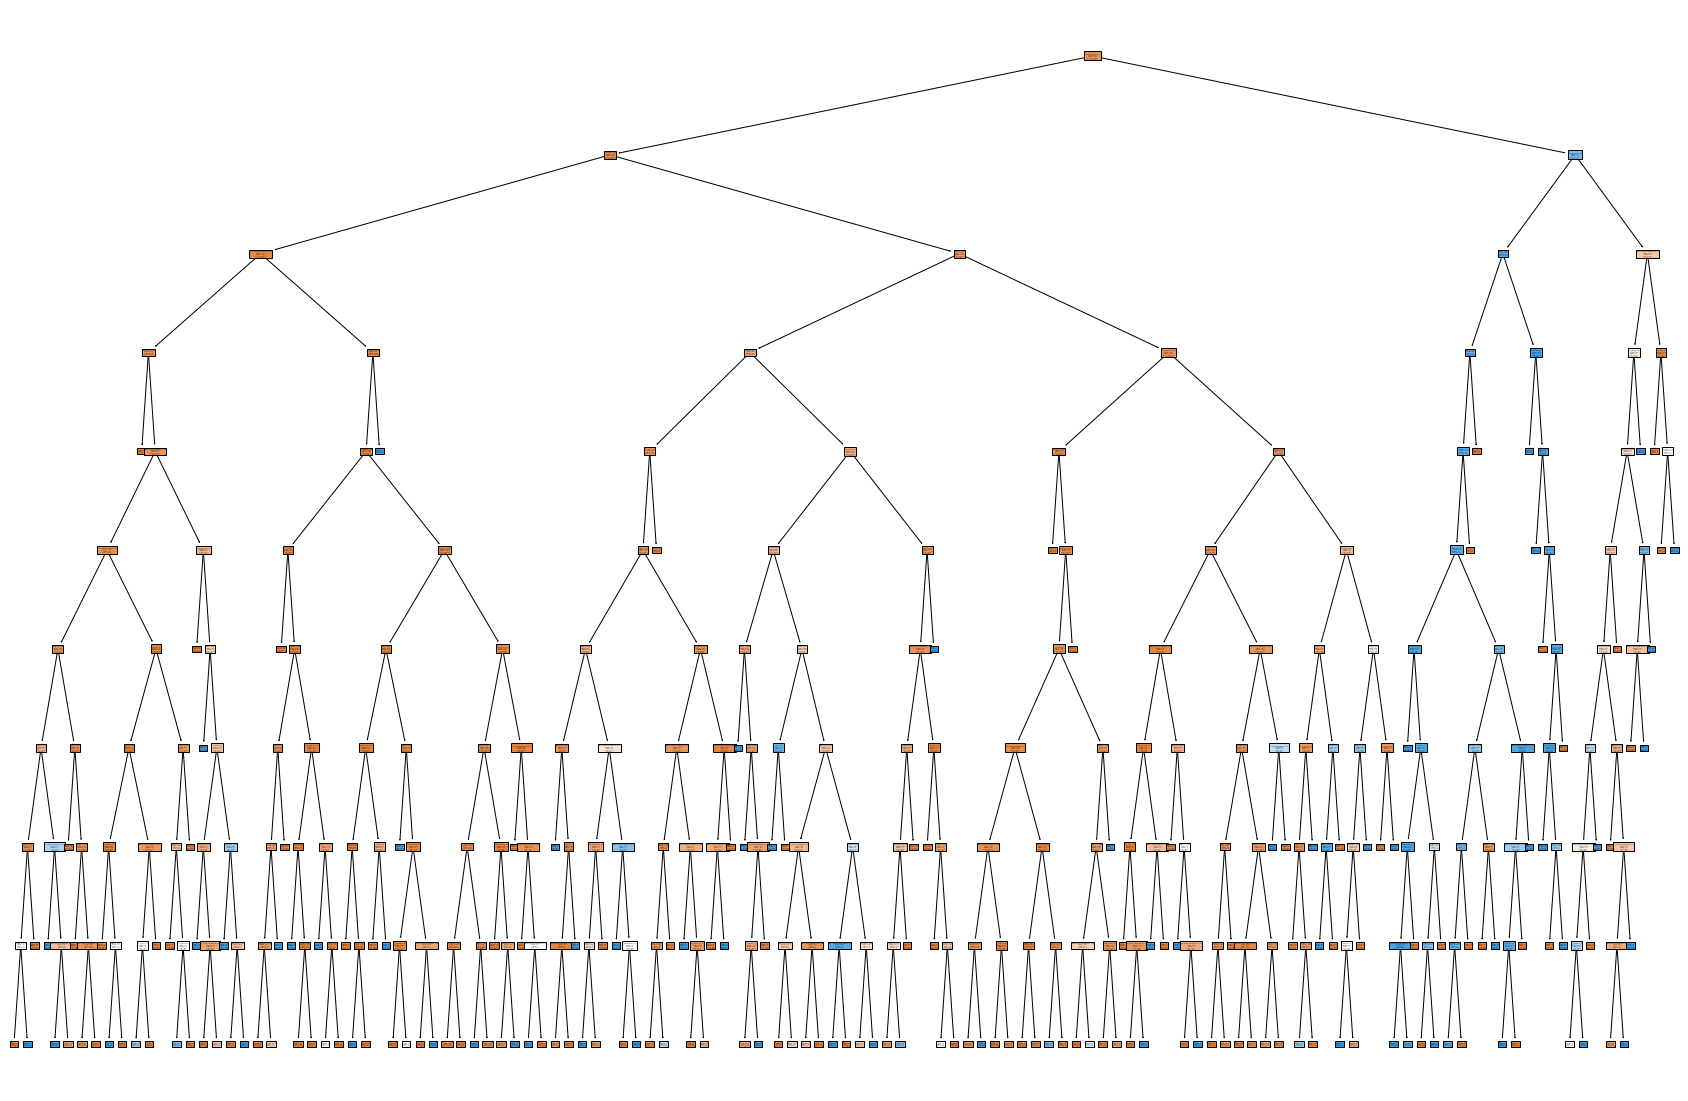

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_tree3, 
               feature_names=list(carAuction.columns)[1:],  
               class_names=['No','Yes'],
               filled=True)

In [ ]:
# Make predictions on training and testing data
prediction_on_train = model_tree3.predict(predictors_train)
prediction_on_test = model_tree3.predict(predictors_test)

In [ ]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96      6087
         Yes       0.94      0.41      0.57       913

    accuracy                           0.92      7000
   macro avg       0.93      0.70      0.76      7000
weighted avg       0.92      0.92      0.90      7000



In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.90      0.97      0.93      2618
         Yes       0.56      0.25      0.35       382

    accuracy                           0.88      3000
   macro avg       0.73      0.61      0.64      3000
weighted avg       0.86      0.88      0.86      3000



Q4. Which decision tree model has the best overall performance on IsBadBuy=Yes class?<br>
The decision tree with the depth = 1 (first model) had the best overall performance on IsBadBuy=Yes class (F Score of 0.39). 

***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the lab5.ipynb file***
2.   ***Upload the lab5.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [ ]:
!jupyter nbconvert --to html IS470_lab5.ipynb

[NbConvertApp] Converting notebook IS470_lab5.ipynb to html
[NbConvertApp] Writing 1107019 bytes to IS470_lab5.html
